In [1]:
import numpy as np
import pandas as pd

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

import pickle
import sys

from sklearn import metrics
from sklearn.svm import SVC

def get_probs_positive_class(pred):
        positive_probs = []

        for prediction in pred:
            positive_probs.append(prediction[1])
        return positive_probs

In [2]:
dataset_path = "/home/colombelli/Documents/research_proc_ds/BRCA/processedBRCA.rds"
read_RDS = robjects.r['readRDS']
df = read_RDS(dataset_path)

with localconverter(robjects.default_converter + pandas2ri.converter):
    pydf = robjects.conversion.rpy2py(df)

    
fold_path = "/home/colombelli/Documents/brca_new_sampling/fold_sampling.pkl"
with open(fold_path, 'rb') as file:
    folds_sampling = pickle.load(file)

In [3]:
fold2 = folds_sampling[1]
training = pydf.loc[fold2[0]]
testing = pydf.loc[fold2[1]]

In [4]:
ranking_output_path = "/home/colombelli/Desktop/BRCA_no_IQR/fold_1/agg_ranking.rds"

read_RDS = robjects.r['readRDS']
ranking = read_RDS(ranking_output_path)

with localconverter(robjects.default_converter + pandas2ri.converter):
    pyrnk = robjects.conversion.rpy2py(ranking)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

best_genes = list(pyrnk.index.values)
best_genes = best_genes[0:5]
print("Selected Genes:", best_genes)

training_x = training.loc[:, best_genes]
testing_x = testing.loc[:, best_genes]

training_y = training.loc[:, ['class']].T.values[0]
testing_y = testing.loc[:, ['class']].T.values[0]

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(training_x, training_y)

print("Accuracy:", clf.score(testing_x, testing_y))
pred = clf.predict_proba(testing_x)
pred = get_probs_positive_class(pred)
print("AUC score:", metrics.roc_auc_score(np.array(testing_y, dtype=int), pred))

Selected Genes: ['MIR4508', 'FIGF', 'IBSP', 'CA4', 'LRRC3B']
Accuracy: 0.9919028340080972
AUC score: 1.0


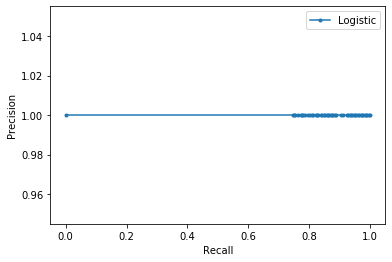

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

precision, recall, _ = precision_recall_curve(testing_y, pred)
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [11]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print(auc_score)

1.0


In [12]:
import random

Iteration: 1
Sampled Genes: ['SLC2A5', 'RAB2B', 'KIAA0040', 'PET112', 'MTCH2']
Accuracy:
0.8380566801619433
ROC curve's AUC score:
0.9600155279503106
PRC AUC score:
0.9958253625354505


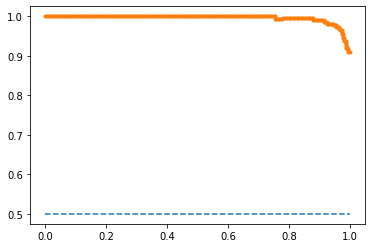




Iteration: 2
Sampled Genes: ['PTN', 'STXBP5L', 'OR10P1', 'IQCF3', 'KLRG2']
Accuracy:
0.8421052631578947
ROC curve's AUC score:
0.9501164596273292
PRC AUC score:
0.9936050530611282


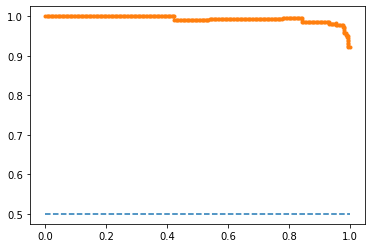




Iteration: 3
Sampled Genes: ['SUSD2', 'A4GNT', 'SVOPL', 'STK35', 'MIR548Z']
Accuracy:
0.757085020242915
ROC curve's AUC score:
0.8977096273291926
PRC AUC score:
0.9875173595508412


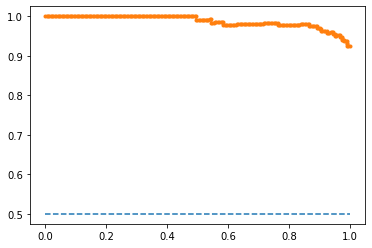




Iteration: 4
Sampled Genes: ['NDUFAF4', 'HIST1H3A', 'MRAP2', 'EPAS1', 'DGKB']
Accuracy:
0.9311740890688259
ROC curve's AUC score:
0.9881599378881988
PRC AUC score:
0.9988042438783692


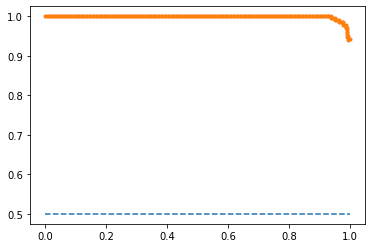




Iteration: 5
Sampled Genes: ['CCL20', 'LOC650368', 'OXTR', 'LMO7', 'PTPN11']
Accuracy:
0.9757085020242915
ROC curve's AUC score:
0.9970885093167703
PRC AUC score:
0.9997073393451421


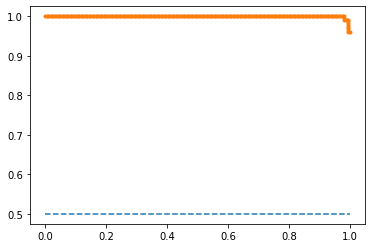




Iteration: 6
Sampled Genes: ['ARPC1A', 'LRRFIP2', 'MIR548AA2', 'MIR1257', 'SNORA80']
Accuracy:
0.5344129554655871
ROC curve's AUC score:
0.7445652173913044
PRC AUC score:
0.9712437803952096


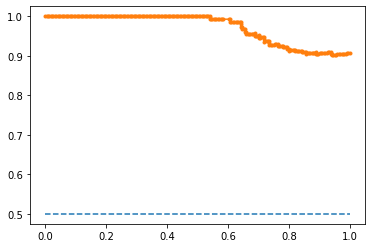




Iteration: 7
Sampled Genes: ['PODNL1', 'UBLCP1', 'SNORD114-11', 'LOC100507156', 'PFKM']
Accuracy:
0.6882591093117408
ROC curve's AUC score:
0.8542313664596273
PRC AUC score:
0.9812493378104333


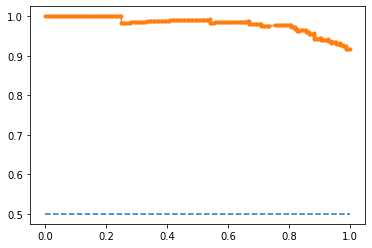




Iteration: 8
Sampled Genes: ['PDHA1', 'HIST1H2BG', 'CEBPG', 'RTCD1', 'GMEB1']
Accuracy:
0.8461538461538461
ROC curve's AUC score:
0.8907220496894409
PRC AUC score:
0.9818101920682162


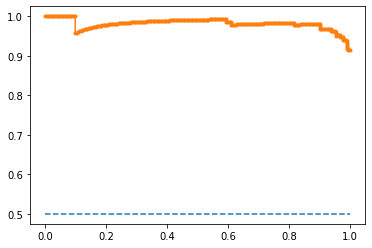




Iteration: 9
Sampled Genes: ['MIR892A', 'TDRG1', 'EDNRB', 'ANKRD20A11P', 'DIP2B']
Accuracy:
0.9271255060728745
ROC curve's AUC score:
0.9796195652173912
PRC AUC score:
0.9979805799659538


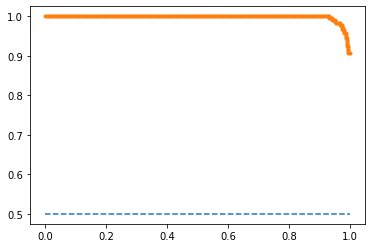

In [14]:
for i in range(1,10):
    print("Iteration:", i)
    
    genes = list(pyrnk.index.values)
    genes = random.sample(genes, 5)
    print("Sampled Genes:", genes)

    training_x = training.loc[:, genes]
    testing_x = testing.loc[:, genes]

    training_y = training.loc[:, ['class']].T.values[0]
    testing_y = testing.loc[:, ['class']].T.values[0]

    clf = SVC(gamma='auto', probability=True)
    clf.fit(training_x, training_y)

    print("Accuracy:")
    print(clf.score(testing_x, testing_y))
    print("ROC curve's AUC score:")
    pred = clf.predict_proba(testing_x)
    pred = get_probs_positive_class(pred)
    print(metrics.roc_auc_score(np.array(testing_y, dtype=int), pred))
    
    precision, recall, _ = precision_recall_curve(testing_y, pred)
    print("PRC AUC score:")
    print(auc(recall, precision))
    pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
    pyplot.plot(recall, precision, marker='.')
    pyplot.show()
    print("\n\n")